# Project Introduction

#### This dataset contains information from telephonic marketing campaigns conducted by a Portuguese bank to promote term deposits. 

# Project Objective

#### The goal is to predict whether a client will subscribe to a term deposit or not. 
#### Predicting term deposit subscriptions allows a bank to focus its marketing efforts on the most likely customers, reducing costs and improving conversion rates. 
#### It helps allocate resources more efficiently, leading to higher profitability and better-targeted campaigns.

# Banking Dataset Approach


##### Modules: Importing the necessary modules to analyse and model the data
##### Data Reading: Data is stored in a csv file and read in using a DataFrame
##### Data Analysis: The dataset it analyzed and the input features are plotted to understand the correlation bewtween different variables.
##### Data Filtering: Filtered the dataset to exclude data rows that do not provide valuable information and does not affect the data     quality of the dataset 
##### Feature Engineering: The input columns are transformed to different bins/buckets to derive better insights and analysis of the data.
#####                      This data helps us realize the different trends, outliers and imbalances in the data to better deal before modelling of data.
##### Model Building: As the data is imbalanced, I used the SMOTE technique to resample the data and deal with the imbalanced data
#####                 This helped to deal with the data variability and helped with model performance and optimization..
##### Model Optimization: The parameters in the model are hypertuned to find the best parameters for the model and improve the efficiency and overall model performance. This helps us highlight the different important parameters and better understand the different features of the model.
##### Model Evaluation: Confusion matrix, Roc-curve and classification reports are used to better analyze the model and differentiate     between the models to select the best model and understand the different trade-offs between the metrics


# Importing Modules

In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report,roc_curve, roc_auc_score, confusion_matrix

# Data Reading

In [255]:
bank_train_df = pd.read_csv('https://raw.githubusercontent.com/selvinfurtado01/schulich_data_science/refs/heads/main/train.csv')
bank_train_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [256]:
bank_test_df = pd.read_csv('https://raw.githubusercontent.com/selvinfurtado01/schulich_data_science/refs/heads/main/test.csv')
bank_test_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [257]:
bank_train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# Data Analysis

In [258]:
# Renaming Columns for better readability
bank_column_name = {
    'default': 'credit_default', 
    'balance': 'yearly_balance', 
    'housing': 'housing_loan',
    'loan': 'personal_loan', 
    'contact': 'communication_type', 
    'day': 'last_day', 
    'month': 'last_month', 
    'duration': 'last_duration', 
    'campaign': 'campaign_num_contacts', 
    'pdays': 'num_days_passed',
    'previous': 'prev_campaign_contacts', 
    'poutcome': 'prev_campaign_outcome', 
    'y': 'subscription_term_deposit'
}

bank_train_df = bank_train_df.rename(columns = bank_column_name)
bank_test_df = bank_test_df.rename(columns = bank_column_name)

In [259]:
bank_train_df.head(5)

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,last_month,last_duration,campaign_num_contacts,num_days_passed,prev_campaign_contacts,prev_campaign_outcome,subscription_term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [260]:
bank_test_df.head(5)

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,last_month,last_duration,campaign_num_contacts,num_days_passed,prev_campaign_contacts,prev_campaign_outcome,subscription_term_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [261]:
# Displaying dataframe info to check for datatypes and null values
bank_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        45211 non-null  int64 
 1   job                        45211 non-null  object
 2   marital                    45211 non-null  object
 3   education                  45211 non-null  object
 4   credit_default             45211 non-null  object
 5   yearly_balance             45211 non-null  int64 
 6   housing_loan               45211 non-null  object
 7   personal_loan              45211 non-null  object
 8   communication_type         45211 non-null  object
 9   last_day                   45211 non-null  int64 
 10  last_month                 45211 non-null  object
 11  last_duration              45211 non-null  int64 
 12  campaign_num_contacts      45211 non-null  int64 
 13  num_days_passed            45211 non-null  int64 
 14  prev_c

In [262]:
# Describing the dataset for Numerical columns
bank_train_df.describe()

,age,yearly_balance,last_day,last_duration,campaign_num_contacts,num_days_passed,prev_campaign_contacts
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [263]:
# None of the columns in the Dataset have NaN values
# Therefore, I did not have to impute any values in the dataset
bank_train_df.isna().sum()

age                          0
job                          0
marital                      0
education                    0
credit_default               0
yearly_balance               0
housing_loan                 0
personal_loan                0
communication_type           0
last_day                     0
last_month                   0
last_duration                0
campaign_num_contacts        0
num_days_passed              0
prev_campaign_contacts       0
prev_campaign_outcome        0
subscription_term_deposit    0
dtype: int64

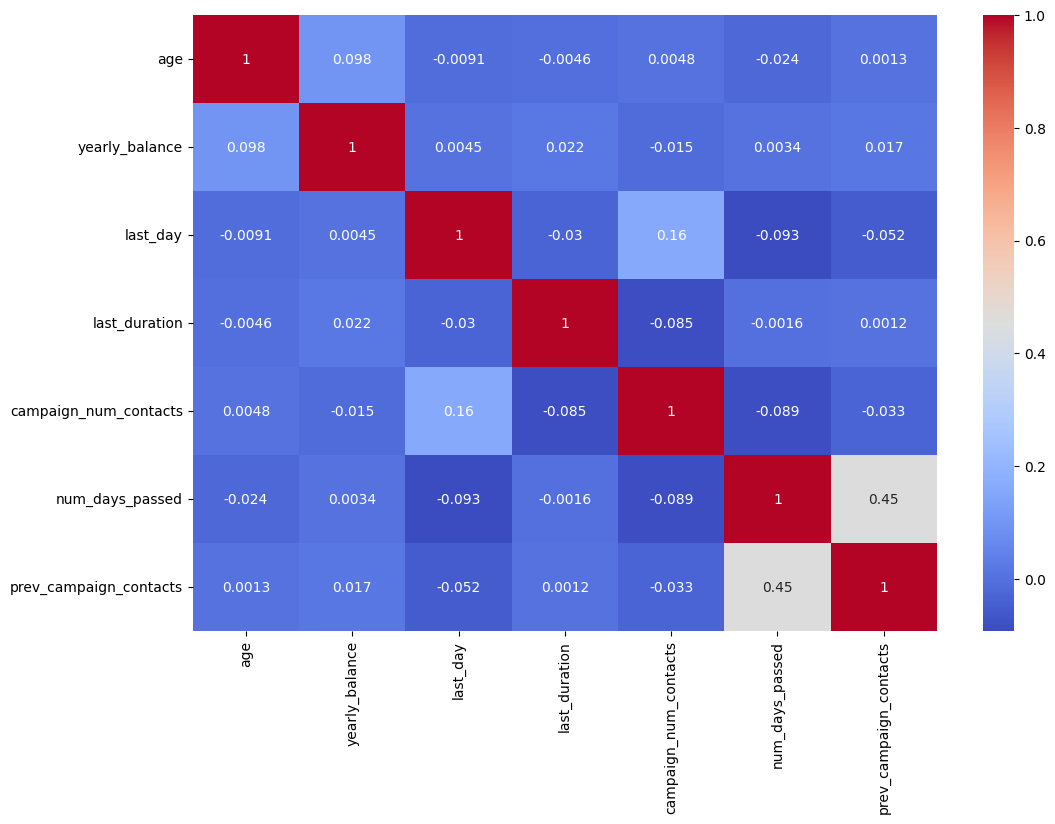

In [264]:
# Numerical Columns: age, yearly_balance, last_day, last_duration, campaign_num_contacts, num_days_passed, prev_campaign_contacts
# Plotting a correlation heatmap to better understand the relationship between different features/data columns

corr = bank_train_df[['age', 'yearly_balance', 'last_day', 'last_duration', 'campaign_num_contacts', 'num_days_passed', 'prev_campaign_contacts']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [265]:
# Checking the balance of the dataset for the output variable in the train dataset
bank_train_df['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     39922
yes     5289
Name: count, dtype: int64

In [266]:
# Checking the balance of the dataset for the output variable in the test dataset
bank_test_df['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     4000
yes     521
Name: count, dtype: int64

## Categorization of Data in the input feature columns

In [267]:
print(f'Job: {bank_train_df['job'].value_counts()}')

Job: job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


In [268]:
print(f'Education: {bank_train_df['education'].value_counts()}')

Education: education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


In [269]:
print(f'Marital: {bank_train_df['marital'].value_counts()}')

Marital: marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


In [270]:
print(f'Contact: {bank_train_df['communication_type'].value_counts()}')

Contact: communication_type
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


In [271]:
print(f'Outcome: {bank_train_df['prev_campaign_outcome'].value_counts()}')

Outcome: prev_campaign_outcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


In [273]:
# Displaying columns in the dataset
bank_train_df.columns

Index(['age', 'job', 'marital', 'education', 'credit_default',
       'yearly_balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_day', 'last_month', 'last_duration', 'campaign_num_contacts',
       'num_days_passed', 'prev_campaign_contacts', 'prev_campaign_outcome',
       'subscription_term_deposit'],
      dtype='object')

In [274]:
# The unknown value in the dataset are a response but do not provide any information for the particular data column
# This indicates that the client had no information/ did not respond to this data 
# The education, communication_type and prev_campaign_outcome have the highest number of "unknown" values
bank_train_df[(bank_train_df['education'] == 'unknown') &
                             (bank_train_df['communication_type'] == 'unknown') &
                             (bank_train_df['prev_campaign_outcome'] == 'unknown')][['education', 'communication_type', 'prev_campaign_outcome', 'subscription_term_deposit']]

,education,communication_type,prev_campaign_outcome,subscription_term_deposit
3,unknown,unknown,unknown,no
4,unknown,unknown,unknown,no
13,unknown,unknown,unknown,no
16,unknown,unknown,unknown,no
42,unknown,unknown,unknown,no
...,...,...,...,...
43849,unknown,unknown,unknown,no
44001,unknown,unknown,unknown,no
44121,unknown,unknown,unknown,no
44590,unknown,unknown,unknown,no


In [275]:
# Hence I found that the data rows having "unknown" values in all the 3 columns as this data that is not provided any valuable insights
# As the total number of common "unknown" values are only 672 values, it is better to drop these values for analysis
bank_train_df[(bank_train_df['education'] == 'unknown') &
                             (bank_train_df['communication_type'] == 'unknown') &
                             (bank_train_df['prev_campaign_outcome'] == 'unknown')]['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     652
yes     20
Name: count, dtype: int64

In [276]:
# Similary even the job column has only 288 unknown values hence these values can be dropped and wouldn't affect the analysis of the data 
bank_train_df[bank_train_df['job'] == 'unknown']['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     254
yes     34
Name: count, dtype: int64

## Data Merging

In [280]:
# This dataframe is created to track only the "yes" response of the output variable: subscription_term_deposit
add_yes_df = bank_test_df[bank_test_df['subscription_term_deposit'] == 'yes']
add_yes_df.head(10)

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,last_month,last_duration,campaign_num_contacts,num_days_passed,prev_campaign_contacts,prev_campaign_outcome,subscription_term_deposit
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes
37,32,blue-collar,married,secondary,no,2089,yes,no,cellular,14,nov,132,1,-1,0,unknown,yes
38,33,management,married,secondary,no,3935,yes,no,cellular,6,may,765,1,342,2,failure,yes
49,61,admin.,married,unknown,no,4629,yes,no,cellular,27,jan,181,1,92,1,success,yes
50,45,blue-collar,divorced,primary,no,844,no,no,unknown,5,jun,1018,3,-1,0,unknown,yes
53,34,technician,married,tertiary,no,1539,yes,no,cellular,15,jun,441,1,56,1,other,yes


In [281]:
add_yes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 521 entries, 13 to 4511
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        521 non-null    int64 
 1   job                        521 non-null    object
 2   marital                    521 non-null    object
 3   education                  521 non-null    object
 4   credit_default             521 non-null    object
 5   yearly_balance             521 non-null    int64 
 6   housing_loan               521 non-null    object
 7   personal_loan              521 non-null    object
 8   communication_type         521 non-null    object
 9   last_day                   521 non-null    int64 
 10  last_month                 521 non-null    object
 11  last_duration              521 non-null    int64 
 12  campaign_num_contacts      521 non-null    int64 
 13  num_days_passed            521 non-null    int64 
 14  prev_campaign

In [282]:
# As the dataset is heavily imbalanced having 40,000 "no" values and 5,000 "yes" values
# Merging the test "yes" response to the dataset to get more output "yes" response values to make the data more balanced
# Hence, merged the train dataframe and the test "yes" response dataframe
banking_df = pd.concat([bank_train_df, add_yes_df])
banking_df.head(10)

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,last_month,last_duration,campaign_num_contacts,num_days_passed,prev_campaign_contacts,prev_campaign_outcome,subscription_term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [283]:
# Most merging the dataset all the "yes" responses are merged together
# Hence, to add variability, used the sample function to randomize the data rows within the dataframe
banking_df = banking_df.sample(frac = 1)

## Banking Dataframe Analysis

In [284]:
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45732 entries, 40034 to 39598
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        45732 non-null  int64 
 1   job                        45732 non-null  object
 2   marital                    45732 non-null  object
 3   education                  45732 non-null  object
 4   credit_default             45732 non-null  object
 5   yearly_balance             45732 non-null  int64 
 6   housing_loan               45732 non-null  object
 7   personal_loan              45732 non-null  object
 8   communication_type         45732 non-null  object
 9   last_day                   45732 non-null  int64 
 10  last_month                 45732 non-null  object
 11  last_duration              45732 non-null  int64 
 12  campaign_num_contacts      45732 non-null  int64 
 13  num_days_passed            45732 non-null  int64 
 14  prev_ca

In [285]:
banking_df.describe()

,age,yearly_balance,last_day,last_duration,campaign_num_contacts,num_days_passed,prev_campaign_contacts
count,45732.000000,45732.000000,45732.000000,45732.000000,45732.000000,45732.000000,45732.000000
mean,40.953927,1364.660872,15.804732,261.519068,2.758178,40.521845,0.586132
std,10.651609,3038.654090,8.321412,261.294401,3.088841,100.447981,2.301382
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,451.000000,16.000000,182.000000,2.000000,-1.000000,0.000000
75%,48.000000,1433.250000,21.000000,323.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [286]:
# Now the dataframe is considerably more balanced and will help us derive better insights and analysis
banking_df['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     39922
yes     5810
Name: count, dtype: int64

In [287]:
banking_df.columns

Index(['age', 'job', 'marital', 'education', 'credit_default',
       'yearly_balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_day', 'last_month', 'last_duration', 'campaign_num_contacts',
       'num_days_passed', 'prev_campaign_contacts', 'prev_campaign_outcome',
       'subscription_term_deposit'],
      dtype='object')

In [288]:
banking_df[banking_df['subscription_term_deposit'] == 'no']['prev_campaign_outcome'].value_counts()

prev_campaign_outcome
unknown    33573
failure     4283
other       1533
success      533
Name: count, dtype: int64

In [289]:
banking_df[banking_df['subscription_term_deposit'] == 'yes']['prev_campaign_outcome'].value_counts()

prev_campaign_outcome
unknown    3723
success    1061
failure     681
other       345
Name: count, dtype: int64

In [290]:
banking_df[banking_df['prev_campaign_outcome'] == 'unknown']

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,last_month,last_duration,campaign_num_contacts,num_days_passed,prev_campaign_contacts,prev_campaign_outcome,subscription_term_deposit
40034,36,technician,divorced,secondary,no,3158,yes,no,cellular,3,jun,144,2,-1,0,unknown,yes
10163,38,blue-collar,married,primary,no,8637,yes,no,unknown,11,jun,119,1,-1,0,unknown,no
6837,33,blue-collar,married,secondary,no,-112,yes,no,unknown,28,may,132,1,-1,0,unknown,no
35649,41,blue-collar,married,secondary,no,2039,yes,no,cellular,8,may,729,1,-1,0,unknown,yes
23630,33,management,single,tertiary,no,0,no,no,cellular,28,aug,13,17,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13331,39,self-employed,married,primary,no,1551,no,no,telephone,8,jul,389,7,-1,0,unknown,no
1994,44,management,married,primary,no,4758,yes,no,cellular,22,jul,712,6,-1,0,unknown,yes
30563,34,management,single,tertiary,no,0,no,no,cellular,5,feb,427,3,-1,0,unknown,no
11181,39,entrepreneur,married,tertiary,no,2310,yes,yes,unknown,18,jun,104,1,-1,0,unknown,no


In [291]:
banking_df[banking_df['prev_campaign_outcome'] != 'unknown']['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     6349
yes    2087
Name: count, dtype: int64

<Axes: xlabel='yearly_balance', ylabel='Count'>

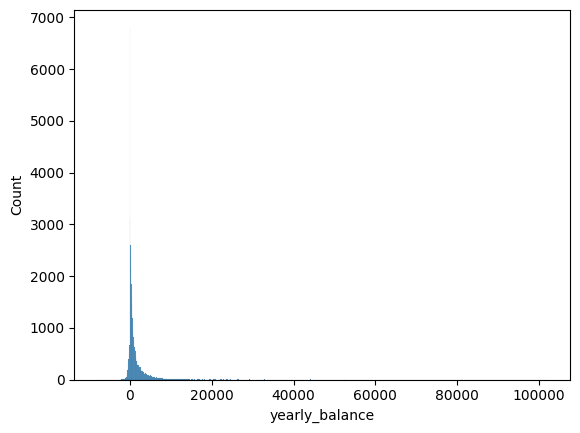

In [292]:
# Histplot for yearly_balance column
sns.histplot(banking_df['yearly_balance'])

In [293]:
banking_df['yearly_balance'].describe()

count     45732.000000
mean       1364.660872
std        3038.654090
min       -8019.000000
25%          73.000000
50%         451.000000
75%        1433.250000
max      102127.000000
Name: yearly_balance, dtype: float64

In [294]:
banking_df[banking_df['yearly_balance'] > 1872]

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,last_month,last_duration,campaign_num_contacts,num_days_passed,prev_campaign_contacts,prev_campaign_outcome,subscription_term_deposit
40034,36,technician,divorced,secondary,no,3158,yes,no,cellular,3,jun,144,2,-1,0,unknown,yes
10163,38,blue-collar,married,primary,no,8637,yes,no,unknown,11,jun,119,1,-1,0,unknown,no
35649,41,blue-collar,married,secondary,no,2039,yes,no,cellular,8,may,729,1,-1,0,unknown,yes
1490,38,services,divorced,secondary,no,5873,no,no,unknown,8,may,191,2,-1,0,unknown,no
44399,43,blue-collar,married,primary,no,2952,no,no,cellular,3,aug,417,2,95,1,other,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16887,37,management,married,tertiary,no,4039,no,yes,cellular,25,jul,106,2,-1,0,unknown,no
25792,35,management,married,tertiary,no,2583,no,no,cellular,19,nov,210,1,-1,0,unknown,no
41954,60,technician,married,secondary,no,10925,no,no,cellular,23,oct,270,3,185,1,success,yes
1994,44,management,married,primary,no,4758,yes,no,cellular,22,jul,712,6,-1,0,unknown,yes


In [295]:
# Checking values at different quantile ranges to better distinct the data columns into buckets for analysis
percentiles = [0.20, 0.40, 0.60, 0.80]
quantiles = banking_df['yearly_balance'].quantile(percentiles)

print("Percentiles: ")
for percentile, value in quantiles.items():
    print(f"{percentile:.0%} percentile: {value}")

Percentiles: 
20% percentile: 23.0
40% percentile: 273.0
60% percentile: 705.0
80% percentile: 1872.800000000003


In [296]:
# Checking values at different quantile ranges to better distinct the data columns into buckets for analysis
percentiles = [0.20, 0.40, 0.60, 0.80]
quantiles = banking_df['age'].quantile(percentiles)

print("Percentiles: ")
for percentile, value in quantiles.items():
    print(f"{percentile:.0%} percentile: {value}")

Percentiles: 
20% percentile: 32.0
40% percentile: 36.0
60% percentile: 42.0
80% percentile: 51.0


In [297]:
banking_df['age'].describe()

count    45732.000000
mean        40.953927
std         10.651609
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

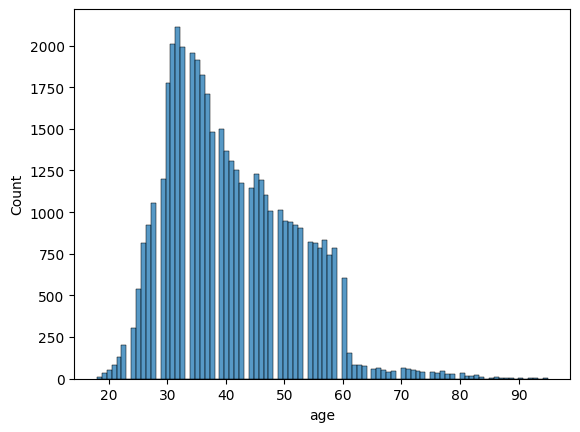

In [298]:
# Histplot for age column
sns.histplot(banking_df['age'])

## Filtering of Banking Dataframe 

In [299]:
# Displaying the "unknwon" values common in the 3 columns (education, communication_type, prev_campaign_outcome)
banking_df[(banking_df['education'] == 'unknown') &
                             (banking_df['communication_type'] == 'unknown') &
                             (banking_df['prev_campaign_outcome'] == 'unknown')][['education', 'communication_type', 'prev_campaign_outcome', 'subscription_term_deposit']]

,education,communication_type,prev_campaign_outcome,subscription_term_deposit
2747,unknown,unknown,unknown,no
10922,unknown,unknown,unknown,no
3863,unknown,unknown,unknown,no
11523,unknown,unknown,unknown,no
300,unknown,unknown,unknown,no
...,...,...,...,...
12127,unknown,unknown,unknown,no
11269,unknown,unknown,unknown,no
1477,unknown,unknown,unknown,no
11762,unknown,unknown,unknown,yes


In [300]:
# Checking the output variable column (subscription_term_deposit): Count of "yes" and "no" responses
banking_df[(banking_df['education'] == 'unknown') &
                             (banking_df['communication_type'] == 'unknown') &
                             (banking_df['prev_campaign_outcome'] == 'unknown')]['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     652
yes     21
Name: count, dtype: int64

In [301]:
# Filtering the dataset to reduce common unknown values
banking_df = banking_df[~((banking_df['education'] == 'unknown') &
                             (banking_df['communication_type'] == 'unknown') &
                             (banking_df['prev_campaign_outcome'] == 'unknown'))]

In [302]:
# Filtering the dataset to reduce common unknown values
banking_df = banking_df[~(banking_df['job'] == 'unknown')]

In [303]:
banking_df['subscription_term_deposit'].value_counts()

subscription_term_deposit
no     39069
yes     5749
Name: count, dtype: int64

In [304]:
banking_df.columns

Index(['age', 'job', 'marital', 'education', 'credit_default',
       'yearly_balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_day', 'last_month', 'last_duration', 'campaign_num_contacts',
       'num_days_passed', 'prev_campaign_contacts', 'prev_campaign_outcome',
       'subscription_term_deposit'],
      dtype='object')

# Feature Engineering

In [305]:
# Mapping values for binary columns
banking_df['credit_default'] = banking_df['credit_default'].replace({'yes': 1, 'no': 0})
banking_df['housing_loan'] = banking_df['housing_loan'].replace({'yes': 1, 'no': 0})
banking_df['personal_loan'] = banking_df['personal_loan'].replace({'yes': 1, 'no': 0})
banking_df['subscription_term_deposit'] = banking_df['subscription_term_deposit'].replace({'yes': 1, 'no': 0})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19532\2736281157.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  banking_df['credit_default'] = banking_df['credit_default'].replace({'yes': 1, 'no': 0})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19532\2736281157.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  banking_df['housing_loan'] = banking_df['housing_loan'].replace({'yes': 1, 'no': 0})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19532\2736281157.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and

In [306]:
banking_df['subscription_term_deposit'].value_counts()

subscription_term_deposit
0    39069
1     5749
Name: count, dtype: int64

In [307]:
# Creating bins for numerical columns
percentiles = [0.20, 0.40, 0.60, 0.80]
quantiles = banking_df['yearly_balance'].quantile(percentiles)

print("Percentiles: ")
for percentile, value in quantiles.items():
    print(f"{percentile:.0%} percentile: {value}")

Percentiles: 
20% percentile: 23.0
40% percentile: 273.0
60% percentile: 703.0
80% percentile: 1866.0


In [308]:
# percentiles = [0.20, 0.40, 0.60, 0.80]
# labels = ['Very Low Income', 'Low Income', 'Median Income', 'High Income', 'Very High Income']

banking_df['Very Low Income'] = (banking_df['yearly_balance'] <= banking_df['yearly_balance'].quantile(0.2)).astype(int)
banking_df['Low Income'] = (banking_df['yearly_balance'] > banking_df['yearly_balance'].quantile(0.2)) & (banking_df['yearly_balance'] <= banking_df['yearly_balance'].quantile(0.4)).astype(int)
banking_df['Median Income'] = (banking_df['yearly_balance'] > banking_df['yearly_balance'].quantile(0.4)) & (banking_df['yearly_balance'] <= banking_df['yearly_balance'].quantile(0.6)).astype(int)
banking_df['High Income'] = (banking_df['yearly_balance'] > banking_df['yearly_balance'].quantile(0.6)) & (banking_df['yearly_balance'] <= banking_df['yearly_balance'].quantile(0.8)).astype(int)
banking_df['Very High Income'] = (banking_df['yearly_balance'] > banking_df['yearly_balance'].quantile(0.8)).astype(int)


In [309]:
# Creating bins for numerical columns
percentiles = [0.20, 0.40, 0.60, 0.80]
quantiles = banking_df['age'].quantile(percentiles)

print("Percentiles: ")
for percentile, value in quantiles.items():
    print(f"{percentile:.0%} percentile: {value}")

Percentiles: 
20% percentile: 31.0
40% percentile: 36.0
60% percentile: 42.0
80% percentile: 51.0


In [310]:
banking_df['Low Age'] = (banking_df['age'] <= banking_df['age'].quantile(0.2)).astype(int)
banking_df['Low Median Age'] = (banking_df['age'] > banking_df['age'].quantile(0.2)) & (banking_df['age'] <= banking_df['age'].quantile(0.4)).astype(int)
banking_df['Median Age'] = (banking_df['age'] > banking_df['age'].quantile(0.4)) & (banking_df['age'] <= banking_df['age'].quantile(0.6)).astype(int)
banking_df['High Median Age'] = (banking_df['age'] > banking_df['age'].quantile(0.6)) & (banking_df['age'] <= banking_df['age'].quantile(0.8)).astype(int)
banking_df['High Age'] = (banking_df['age'] > banking_df['age'].quantile(0.8)).astype(int)

In [311]:
banking_df['last_day'].value_counts()

last_day
20    2679
18    2311
21    2028
17    1933
6     1864
5     1862
14    1849
8     1830
28    1812
7     1793
29    1719
19    1709
15    1699
12    1601
13    1579
30    1572
9     1538
11    1459
4     1433
16    1394
2     1292
27    1117
3     1067
26    1026
23     931
22     915
25     843
31     645
10     536
24     454
1      328
Name: count, dtype: int64

In [312]:
# Get value counts
bins = [1, 7, 13, 19, 25, 30, 32]
labels = ['1-6', '7-12', '13-18', '19-24', '25-29', '30-31']

# Assign buckets to a new column
banking_df['last_day_bucket'] = pd.cut(banking_df['last_day'], bins=bins, labels=labels, right=False)

In [313]:
# Divided the last day contacted of the month into 6 buckets to have a more evenly distributed data for better insights. 

banking_df['last_day_bucket'].value_counts()

last_day_bucket
13-18    10765
7-12      8757
19-24     8716
1-6       7846
25-29     6517
30-31     2217
Name: count, dtype: int64

In [314]:
banking_df[banking_df['last_day'] < 7]

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,...,Low Income,Median Income,High Income,Very High Income,Low Age,Low Median Age,Median Age,High Median Age,High Age,last_day_bucket
40034,36,technician,divorced,secondary,0,3158,1,0,cellular,3,...,False,False,False,1,0,True,False,False,0,1-6
9063,57,blue-collar,married,primary,0,60,0,0,unknown,5,...,True,False,False,0,0,False,False,False,1,1-6
44399,43,blue-collar,married,primary,0,2952,0,0,cellular,3,...,False,False,False,1,0,False,False,True,0,1-6
42152,42,management,married,tertiary,0,520,0,0,cellular,4,...,False,True,False,0,0,False,True,False,0,1-6
44638,65,technician,married,secondary,0,2303,0,0,cellular,1,...,False,False,False,1,0,False,False,False,1,1-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29257,31,services,divorced,secondary,0,139,0,0,cellular,2,...,True,False,False,0,1,False,False,False,0,1-6
34532,24,student,single,secondary,0,547,0,0,telephone,5,...,False,True,False,0,1,False,False,False,0,1-6
322,48,management,married,secondary,0,161,1,0,unknown,5,...,True,False,False,0,0,False,False,True,0,1-6
113,36,blue-collar,married,primary,0,448,1,0,unknown,5,...,False,True,False,0,0,True,False,False,0,1-6


In [315]:
banking_df.columns

Index(['age', 'job', 'marital', 'education', 'credit_default',
       'yearly_balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_day', 'last_month', 'last_duration', 'campaign_num_contacts',
       'num_days_passed', 'prev_campaign_contacts', 'prev_campaign_outcome',
       'subscription_term_deposit', 'Very Low Income', 'Low Income',
       'Median Income', 'High Income', 'Very High Income', 'Low Age',
       'Low Median Age', 'Median Age', 'High Median Age', 'High Age',
       'last_day_bucket'],
      dtype='object')

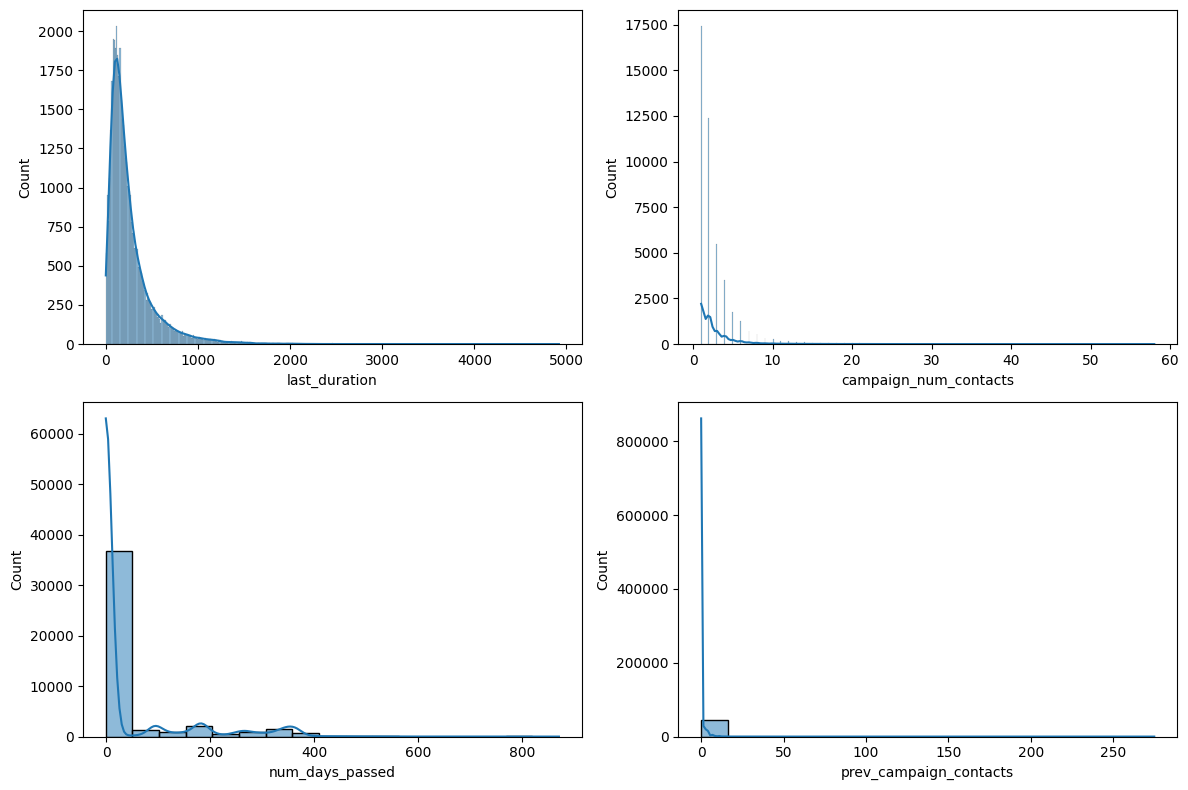

In [316]:
# Subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.histplot(data=banking_df, x='last_duration', kde=True, ax=axes[0, 0])
sns.histplot(data=banking_df, x='campaign_num_contacts', kde=True, ax=axes[0, 1])
sns.histplot(data=banking_df, x='num_days_passed', kde=True, ax=axes[1, 0])
sns.histplot(data=banking_df, x='prev_campaign_contacts', kde=True, ax=axes[1, 1])

plt.tight_layout()
plt.show()

In [317]:
percentiles = [0.20, 0.40, 0.60, 0.80]
quantiles = banking_df['last_duration'].quantile(percentiles)

print("Percentiles: ")
for percentile, value in quantiles.items():
    print(f"{percentile:.0%} percentile: {value}")

Percentiles: 
20% percentile: 90.0
40% percentile: 148.0
60% percentile: 225.0
80% percentile: 374.0


In [318]:
# Dividing the 4 data columns based on quantile ranges of every 20% to tackle right-skewed distribution
quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['Low', 'Low-Median', 'Median', 'High-Median', 'High']

# Creating new buckets based on quantiles for the last duration column
banking_df['last_duration_bucket'] = pd.qcut(banking_df['last_duration'], q=quantiles, labels=labels)

banking_df['last_duration_bucket'].value_counts()

last_duration_bucket
Low            9062
Median         8965
High-Median    8964
High           8939
Low-Median     8888
Name: count, dtype: int64

In [319]:
print(banking_df['prev_campaign_contacts'].value_counts())

prev_campaign_contacts
0      36414
1       2813
2       2144
3       1160
4        736
5        469
6        283
7        206
8        132
9         95
10        69
11        65
12        45
13        38
14        21
15        20
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
21         4
25         4
29         4
30         3
37         2
28         2
26         2
38         2
55         1
41         1
32         1
40         1
58         1
35         1
51         1
275        1
Name: count, dtype: int64


In [320]:
print(banking_df['campaign_num_contacts'].value_counts())

campaign_num_contacts
1     17429
2     12403
3      5458
4      3517
5      1740
6      1278
7       723
8       530
9       316
10      262
11      193
12      153
13      130
14       88
15       81
16       76
17       69
18       49
20       43
19       43
21       34
22       23
25       22
24       21
23       21
28       16
29       15
31       12
26       12
32        9
27        9
30        8
33        6
34        5
36        4
35        3
38        3
43        3
50        2
41        2
58        1
39        1
37        1
51        1
44        1
55        1
46        1
Name: count, dtype: int64


In [321]:
banking_df[['num_days_passed', 'prev_campaign_contacts', 'campaign_num_contacts']].describe()

,num_days_passed,prev_campaign_contacts,campaign_num_contacts
count,44818.000000,44818.000000,44818.000000
mean,41.200120,0.595743,2.751595
std,101.097588,2.321762,3.064150
min,-1.000000,0.000000,1.000000
25%,-1.000000,0.000000,1.000000
50%,-1.000000,0.000000,2.000000
75%,-1.000000,0.000000,3.000000
max,871.000000,275.000000,58.000000


In [322]:
banking_df[banking_df['num_days_passed'] == 0]

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,...,Median Income,High Income,Very High Income,Low Age,Low Median Age,Median Age,High Median Age,High Age,last_day_bucket,last_duration_bucket


In [323]:
banking_df[banking_df['num_days_passed'] == -1]

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,...,Median Income,High Income,Very High Income,Low Age,Low Median Age,Median Age,High Median Age,High Age,last_day_bucket,last_duration_bucket
40034,36,technician,divorced,secondary,0,3158,1,0,cellular,3,...,False,False,1,0,True,False,False,0,1-6,Low-Median
10163,38,blue-collar,married,primary,0,8637,1,0,unknown,11,...,False,False,1,0,False,True,False,0,7-12,Low-Median
6837,33,blue-collar,married,secondary,0,-112,1,0,unknown,28,...,False,False,0,0,True,False,False,0,25-29,Low-Median
35649,41,blue-collar,married,secondary,0,2039,1,0,cellular,8,...,False,False,1,0,False,True,False,0,7-12,High
23630,33,management,single,tertiary,0,0,0,0,cellular,28,...,False,False,0,0,True,False,False,0,25-29,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42582,72,retired,married,primary,0,0,0,0,cellular,29,...,False,False,0,0,False,False,False,1,25-29,Median
13331,39,self-employed,married,primary,0,1551,0,0,telephone,8,...,False,True,0,0,False,True,False,0,7-12,High
1994,44,management,married,primary,0,4758,1,0,cellular,22,...,False,False,1,0,False,False,True,0,19-24,High
30563,34,management,single,tertiary,0,0,0,0,cellular,5,...,False,False,0,0,True,False,False,0,1-6,High


In [324]:
banking_df[(banking_df['num_days_passed'] <= 180) & (banking_df['num_days_passed'] > 0)]

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,...,Median Income,High Income,Very High Income,Low Age,Low Median Age,Median Age,High Median Age,High Age,last_day_bucket,last_duration_bucket
44399,43,blue-collar,married,primary,0,2952,0,0,cellular,3,...,False,False,1,0,False,False,True,0,1-6,High
24765,53,technician,married,secondary,0,137,0,1,cellular,18,...,False,False,0,0,False,False,False,1,13-18,Low
36514,50,retired,married,secondary,0,8648,0,0,cellular,12,...,False,False,1,0,False,False,True,0,7-12,High
41266,33,management,married,secondary,0,369,0,0,cellular,25,...,True,False,0,0,True,False,False,0,25-29,Low
35125,31,self-employed,single,secondary,0,148,1,1,cellular,6,...,False,False,0,1,False,False,False,0,1-6,High-Median
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,30,management,married,tertiary,0,6432,1,0,cellular,5,...,False,False,1,1,False,False,False,0,1-6,High-Median
24350,59,management,married,tertiary,0,0,0,0,cellular,17,...,False,False,0,0,False,False,False,1,13-18,Low
34036,25,admin.,single,secondary,0,483,0,1,cellular,30,...,True,False,0,1,False,False,False,0,30-31,Low
25207,47,blue-collar,married,primary,0,1533,0,1,cellular,18,...,False,True,0,0,False,False,True,0,13-18,High-Median


In [325]:
banking_df[(banking_df['num_days_passed'] > 270)]

,age,job,marital,education,credit_default,yearly_balance,housing_loan,personal_loan,communication_type,last_day,...,Median Income,High Income,Very High Income,Low Age,Low Median Age,Median Age,High Median Age,High Age,last_day_bucket,last_duration_bucket
37003,41,admin.,single,secondary,0,334,1,0,cellular,13,...,True,False,0,0,False,True,False,0,13-18,Low
37503,35,blue-collar,married,primary,0,298,1,0,cellular,13,...,True,False,0,0,True,False,False,0,13-18,Low-Median
31731,24,admin.,single,secondary,0,5,0,0,cellular,7,...,False,False,0,1,False,False,False,0,7-12,Low
30313,26,services,single,secondary,0,598,1,0,cellular,5,...,True,False,0,1,False,False,False,0,1-6,High
42770,32,admin.,single,tertiary,0,291,0,0,telephone,28,...,True,False,0,0,True,False,False,0,25-29,Median
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38478,23,blue-collar,single,primary,0,8627,1,0,cellular,15,...,False,False,1,1,False,False,False,0,13-18,Median
30075,50,management,married,tertiary,0,3284,1,0,cellular,4,...,False,False,1,0,False,False,True,0,1-6,Median
38333,39,services,married,secondary,0,3165,1,0,cellular,15,...,False,False,1,0,False,True,False,0,13-18,Low
36148,39,technician,single,secondary,0,283,1,0,cellular,11,...,True,False,0,0,False,True,False,0,7-12,High-Median


In [326]:
# This function, categorizes the number of days (num_days) into different time brackets based on the value provided. 
# It returns labels to group records for easier analysis of time-based data.

def days_passed_bracket(num_days):
  if num_days == -1:
    return 'Not Contacted'
  elif num_days > 0 and num_days <= 90:
    return '0-90 days'
  elif num_days >= 91 and num_days <= 180:
    return '91-180 days'
  elif num_days >= 181 and num_days <= 270:
    return '181-270 days'
  elif num_days >= 271 and num_days <= 360:
    return '271-360 days'
  else:
    '360+ days'

# Apply the function to the num_days_passed column
banking_df['num_days_passed_bucket'] = banking_df['num_days_passed'].apply(days_passed_bracket)

In [327]:
banking_df['num_days_passed_bucket'].value_counts()

num_days_passed_bucket
Not Contacted    36414
91-180 days       2528
181-270 days      2124
271-360 days      2108
0-90 days          740
Name: count, dtype: int64

In [328]:
banking_df['prev_campaign_contacts'].value_counts()

prev_campaign_contacts
0      36414
1       2813
2       2144
3       1160
4        736
5        469
6        283
7        206
8        132
9         95
10        69
11        65
12        45
13        38
14        21
15        20
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
21         4
25         4
29         4
30         3
37         2
28         2
26         2
38         2
55         1
41         1
32         1
40         1
58         1
35         1
51         1
275        1
Name: count, dtype: int64

In [329]:
# This code divides the customers contacted for previous campaign in 6 brackets for better analyzing the field because majority were not contacted 
# at all and for those who were contacted, majority of the data were within 20 contacts. Therefore, the brackets have been created this way.

def prev_campaign_contact(contact):
  if contact == 0:
    return 'Not Contacted'
  elif contact > 0 and contact <= 5:
    return '0-5 contacts'
  elif contact >= 6 and contact <= 10:
    return '6-10 contacts'
  elif contact >= 11 and contact <= 15:
    return '11-15 contacts'
  elif contact >= 16 and contact <= 20:
    return '16-20 contacts'
  else:
    '20+ contacts'

# Apply the function to the num_days_passed column
banking_df['prev_campaign_contacts_bracket'] = banking_df['prev_campaign_contacts'].apply(prev_campaign_contact)

In [330]:
banking_df['prev_campaign_contacts_bracket'].value_counts()

prev_campaign_contacts_bracket
Not Contacted     36414
0-5 contacts       7322
6-10 contacts       785
11-15 contacts      189
16-20 contacts       53
Name: count, dtype: int64

In [331]:
banking_df.columns

Index(['age', 'job', 'marital', 'education', 'credit_default',
       'yearly_balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_day', 'last_month', 'last_duration', 'campaign_num_contacts',
       'num_days_passed', 'prev_campaign_contacts', 'prev_campaign_outcome',
       'subscription_term_deposit', 'Very Low Income', 'Low Income',
       'Median Income', 'High Income', 'Very High Income', 'Low Age',
       'Low Median Age', 'Median Age', 'High Median Age', 'High Age',
       'last_day_bucket', 'last_duration_bucket', 'num_days_passed_bucket',
       'prev_campaign_contacts_bracket'],
      dtype='object')

In [332]:
# Based on this bracket classification, It is observed that majority of the people responded within the first 5 contacts.  
# Therefore, Check if there is a correaltion between number of contacts and term deposit. 

def campaign_contact(contact):
  if contact > 0 and contact <= 5:
    return '0-5 contacts'
  elif contact >= 6 and contact <= 10:
    return '6-10 contacts'
  elif contact >= 11 and contact <= 15:
    return '11-15 contacts'
  elif contact >= 16 and contact <= 20:
    return '16-20 contacts'
  elif contact >= 21 and contact <= 25:
    return '21-25 contacts'
  else:
    '25+ contacts'

# Apply the function to the num_days_passed column
banking_df['campaign_num_contacts_bracket'] = banking_df['campaign_num_contacts'].apply(campaign_contact)

In [333]:
banking_df['campaign_num_contacts_bracket'].value_counts()

campaign_num_contacts_bracket
0-5 contacts      40547
6-10 contacts      3109
11-15 contacts      645
16-20 contacts      280
21-25 contacts      121
Name: count, dtype: int64

In [334]:
banking_df.columns

Index(['age', 'job', 'marital', 'education', 'credit_default',
       'yearly_balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_day', 'last_month', 'last_duration', 'campaign_num_contacts',
       'num_days_passed', 'prev_campaign_contacts', 'prev_campaign_outcome',
       'subscription_term_deposit', 'Very Low Income', 'Low Income',
       'Median Income', 'High Income', 'Very High Income', 'Low Age',
       'Low Median Age', 'Median Age', 'High Median Age', 'High Age',
       'last_day_bucket', 'last_duration_bucket', 'num_days_passed_bucket',
       'prev_campaign_contacts_bracket', 'campaign_num_contacts_bracket'],
      dtype='object')

In [335]:
# All categorical variables have been divided based into particular fields based on their distinct values.

banking_df[['job', 'marital', 'education', 'communication_type', 'last_month', 'prev_campaign_outcome']].value_counts()

job            marital  education  communication_type  last_month  prev_campaign_outcome
blue-collar    married  secondary  unknown             may         unknown                  1004
management     married  tertiary   cellular            aug         unknown                   932
blue-collar    married  primary    unknown             may         unknown                   812
technician     married  secondary  cellular            aug         unknown                   637
management     married  tertiary   cellular            jul         unknown                   554
                                                                                            ... 
self-employed  married  secondary  cellular            sep         success                     1
                                                       oct         success                     1
                                                                   failure                     1
                                      

In [336]:
banking_df['last_month_bracket'] = pd.to_datetime(banking_df['last_month'], format='%b').dt.month

In [337]:
banking_df['last_month_bracket'].describe()

count    44818.000000
mean         6.154268
std          2.426543
min          1.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: last_month_bracket, dtype: float64

In [338]:
banking_df['marital_bracket'] = banking_df['marital'].replace({'single': 1, 'married': 2, 'divorced': 3})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19532\3087267641.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  banking_df['marital_bracket'] = banking_df['marital'].replace({'single': 1, 'married': 2, 'divorced': 3})


In [339]:
banking_df['marital_bracket'].describe()

count    44818.000000
mean         1.832210
std          0.609777
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: marital_bracket, dtype: float64

In [340]:
# Unknown values: job, education, communication_type, prev_campaign_outcome
banking_df['job'] = banking_df['job'].replace({'unknown': 0, 'unemployed': 1, 'self-employed': 2, 'retired': 3, 
                                               'housemaid': 4, 'entrepreneur': 5, 'student': 6, 'blue-collar': 7, 
                                               'management': 8, 'admin.': 9, 'technician': 10, 'services': 11})
banking_df['education'] = banking_df['education'].replace({'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 0})
banking_df['communication_type'] = banking_df['communication_type'].replace({'telephone': 1, 'cellular': 2, 'unknown': 0})
banking_df['prev_campaign_outcome'] = banking_df['prev_campaign_outcome'].replace({'unknown': 0, 'failure': 1, 'success': 2, 'other': 3})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19532\917450252.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  banking_df['job'] = banking_df['job'].replace({'unknown': 0, 'unemployed': 1, 'self-employed': 2, 'retired': 3,
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19532\917450252.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  banking_df['education'] = banking_df['education'].replace({'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 0})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19532\917450252.py:6: FutureWarnin

In [341]:
banking_df.columns

Index(['age', 'job', 'marital', 'education', 'credit_default',
       'yearly_balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_day', 'last_month', 'last_duration', 'campaign_num_contacts',
       'num_days_passed', 'prev_campaign_contacts', 'prev_campaign_outcome',
       'subscription_term_deposit', 'Very Low Income', 'Low Income',
       'Median Income', 'High Income', 'Very High Income', 'Low Age',
       'Low Median Age', 'Median Age', 'High Median Age', 'High Age',
       'last_day_bucket', 'last_duration_bucket', 'num_days_passed_bucket',
       'prev_campaign_contacts_bracket', 'campaign_num_contacts_bracket',
       'last_month_bracket', 'marital_bracket'],
      dtype='object')

In [342]:
# Split data into input and output variables
# One-Hot Encoding of input columns 
X = pd.get_dummies(banking_df[['job', 'education', 'credit_default', 'housing_loan', 'personal_loan', 
                               'communication_type', 'prev_campaign_outcome', 'Very Low Income', 'Low Income', 
                               'Median Income', 'High Income', 'Very High Income', 'Low Age', 'Low Median Age', 
                               'Median Age', 'High Median Age', 'High Age', 'last_day_bucket', 'last_duration_bucket', 
                               'num_days_passed_bucket', 'prev_campaign_contacts_bracket', 'campaign_num_contacts_bracket', 
                               'last_month_bracket', 'marital_bracket']])

# Model Output Column
y = banking_df['subscription_term_deposit']

In [343]:
X.columns

Index(['job', 'education', 'credit_default', 'housing_loan', 'personal_loan',
       'communication_type', 'prev_campaign_outcome', 'Very Low Income',
       'Low Income', 'Median Income', 'High Income', 'Very High Income',
       'Low Age', 'Low Median Age', 'Median Age', 'High Median Age',
       'High Age', 'last_month_bracket', 'marital_bracket',
       'last_day_bucket_1-6', 'last_day_bucket_7-12', 'last_day_bucket_13-18',
       'last_day_bucket_19-24', 'last_day_bucket_25-29',
       'last_day_bucket_30-31', 'last_duration_bucket_Low',
       'last_duration_bucket_Low-Median', 'last_duration_bucket_Median',
       'last_duration_bucket_High-Median', 'last_duration_bucket_High',
       'num_days_passed_bucket_0-90 days',
       'num_days_passed_bucket_181-270 days',
       'num_days_passed_bucket_271-360 days',
       'num_days_passed_bucket_91-180 days',
       'num_days_passed_bucket_Not Contacted',
       'prev_campaign_contacts_bracket_0-5 contacts',
       'prev_campaign_con

# Model Building

In [344]:
# Model Building
# SMOTE Pipeline with inputs and output
# Hypertune the model: GridSearch for the Model with SMOTE pipeline

In [345]:
# Building Baseline Models: Logistic Regression and KNN

## Traditional Model


### Logistic Regression 

In [346]:
# Logistic Regression Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fitting and Making Predictions for the Logistic Regression model
logreg_model = LogisticRegression()

# Pipeline
steps = [
    ('smote', SMOTE(sampling_strategy='minority')),
    ('logreg', logreg_model)
]

# Creating a pipeline
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)

# Make predictions on data
model_prediction = pipeline.predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic Regression Model Evaluation

In [347]:
# Evaluating the model performance
model_accuracy = accuracy_score(y_test, model_prediction)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, model_prediction)
print(f'Classification Report: {class_report}')

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_prediction))

Model Accuracy: 0.8600624721106649
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.92      0.92      9826
           1       0.43      0.43      0.43      1379

    accuracy                           0.86     11205
   macro avg       0.68      0.68      0.68     11205
weighted avg       0.86      0.86      0.86     11205

Confusion Matrix:
[[9038  788]
 [ 780  599]]


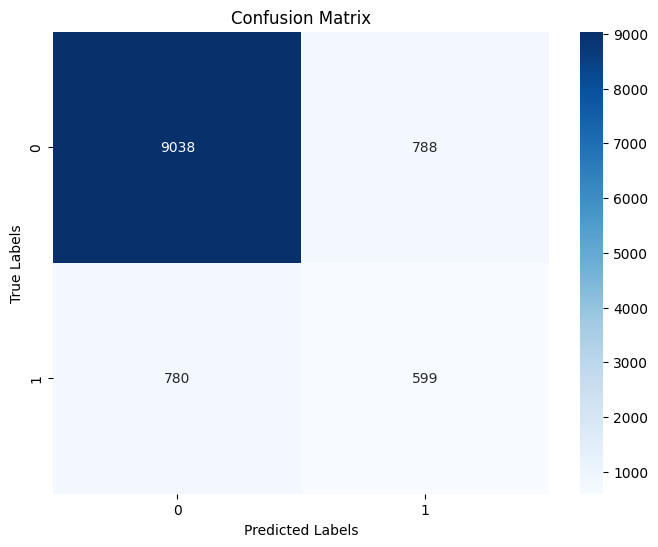

In [348]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, model_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In the above confusion matrix, the overall performance seems better at predicting class 0 than class 1, indicating a possible class imbalance or need for further tuning.

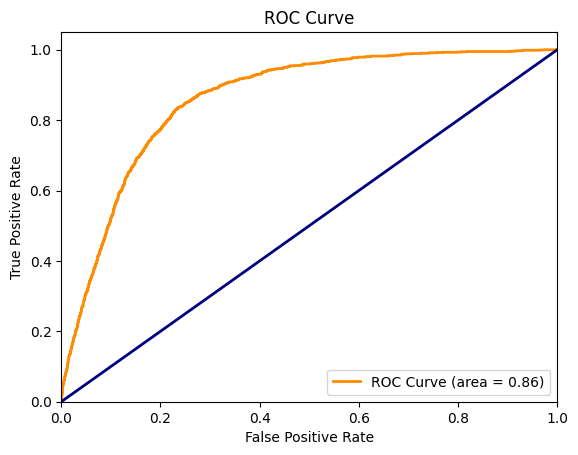

In [349]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Here ROC curve demonstrate AUC of 0.86, which is fairly good predictive performance. There is still some need for performance in reducing the false-positive rate and increasing the true positive rate. 

In [350]:
# Counting values correctly predicted by the Logistic Regression model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, model_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Logistic Regression Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Logistic Regression Model:
Number of Total Predictions: 11205
Number of Correct Predictions: 9637
Number of Wrong Predictions: 1568


Logistic Regression model results in an accuracy of 86% and an error rate of 14%. 

In [351]:
# Hypertunning
# Model Optimization for Logistic Regression Model

# Optimize Logistic Regression
param_grid_log = {
    'logreg__C': [0.1, 1, 10], 
    'logreg__penalty': ['l1', 'l2'], 
    'logreg__solver': ['liblinear', 'lbfgs']
}

grid_log = GridSearchCV(pipeline, param_grid_log, cv=5, scoring='roc_auc')
grid_log.fit(X_train, y_train)

best_log = grid_log.best_estimator_
y_pred_best_log = best_log.predict(X_test)
print("Best Parameters for Logistic Regression: ", grid_log.best_params_)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Best Parameters for Logistic Regression:  {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}


In [352]:
# Evaluation function for Optimized Logistic Regression Model
def evaluate_model(model, X_test, y_test, y_pred):
    print(f"Model: {model}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:")
    print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

evaluate_model(best_log, X_test, y_test, y_pred_best_log)

Model: Pipeline(steps=[('smote', SMOTE(sampling_strategy='minority')),
                ('logreg', LogisticRegression(C=0.1, solver='liblinear'))])
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      9826
           1       0.43      0.49      0.46      1379

    accuracy                           0.86     11205
   macro avg       0.68      0.70      0.69     11205
weighted avg       0.87      0.86      0.86     11205

Confusion Matrix:
[[8940  886]
 [ 705  674]]
ROC AUC Score:
0.8616129869297938


### KNN Model

In [353]:
# KNN Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
knn_model = KNeighborsClassifier()

# Pipeline
steps = [
    ('smote', SMOTE(sampling_strategy='minority')),
    ('knn', knn_model)
]

# Creating a pipeline
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)

# Make predictions on data
model_prediction = pipeline.predict(X_test)

## KNN Model Evaluation

In [354]:
# Evaluating the model performance
model_accuracy = accuracy_score(y_test, model_prediction)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, model_prediction)
print(f'Classification Report: {class_report}')

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_prediction))

Model Accuracy: 0.801338688085676
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.81      0.88      9826
           1       0.36      0.77      0.49      1379

    accuracy                           0.80     11205
   macro avg       0.66      0.79      0.68     11205
weighted avg       0.89      0.80      0.83     11205

Confusion Matrix:
[[7920 1906]
 [ 320 1059]]


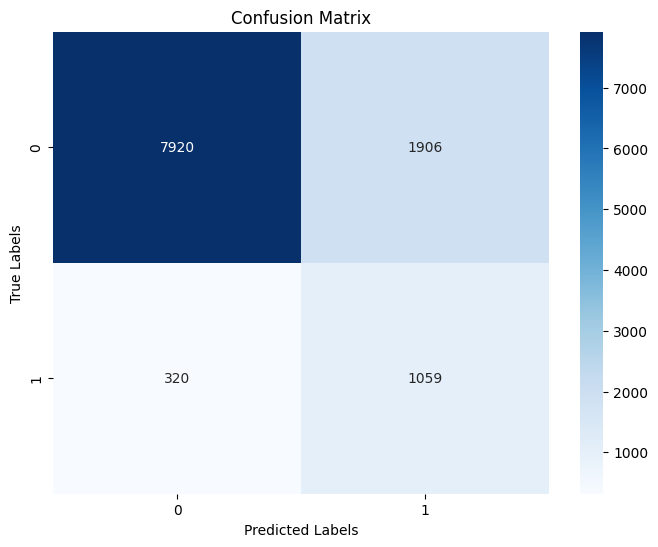

In [355]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, model_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

KNN Model performs reasonably well, with a high recall and a good balance between precision and recall. 

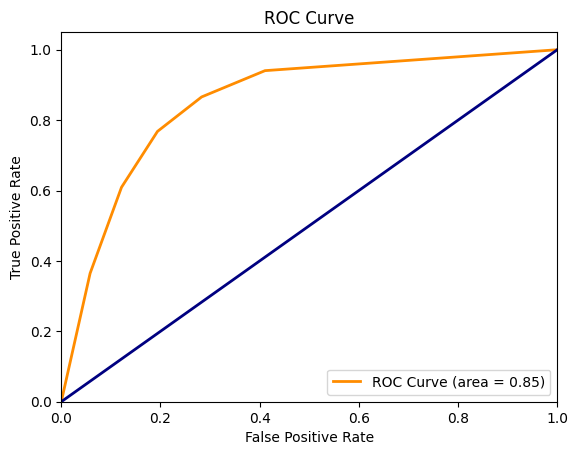

In [356]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Here, the area under the curve (AUC) is 0.85, indicating that the model performs well in distinguishing between the two classes.

In [357]:
# Counting values correctly predicted by the KNN model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, model_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a KNN Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a KNN Model:
Number of Total Predictions: 11205
Number of Correct Predictions: 8979
Number of Wrong Predictions: 2226


Observation: KNN Model results in an accuracy of 80.1% and an error rate of 19.9%.By comparing, Logistic Regression model performed better with error rate of 14%

In [358]:
# Hypertunning 
# Model Optimization for KNN Model

# Parameters
param_grid_knn = {
    'knn__n_neighbors': [5, 10, 15, 20],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'kd_tree']
}

grid_knn = GridSearchCV(pipeline, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

print("Best Parameters for KNN Model: ", grid_knn.best_params_)

Best Parameters for KNN Model:  {'knn__algorithm': 'kd_tree', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}


In [359]:
# Evaluate the KNN model
evaluate_model(best_knn, X_test, y_test, y_pred_best_knn)

Model: Pipeline(steps=[('smote', SMOTE(sampling_strategy='minority')),
                ('knn',
                 KNeighborsClassifier(algorithm='kd_tree',
                                      weights='distance'))])
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      9826
           1       0.40      0.68      0.51      1379

    accuracy                           0.84     11205
   macro avg       0.68      0.77      0.70     11205
weighted avg       0.88      0.84      0.85     11205

Confusion Matrix:
[[8429 1397]
 [ 436  943]]
ROC AUC Score:
0.838497248793252


## Ensemble Models

### Random Forest Model

In [360]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Pipeline 
steps = [
    ('smote', SMOTE(sampling_strategy='minority')),
    ('randomforest', rf_model) 
]

# Create a pipeline
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)

# Make predictions on data
model_prediction = pipeline.predict(X_test)

## Random Forest Model Evaluation

In [361]:
# Evaluating the model performance
model_accuracy = accuracy_score(y_test, model_prediction)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, model_prediction)
print(f'Classification Report: {class_report}')

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_prediction))

Model Accuracy: 0.878268630075859
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.92      0.93      9826
           1       0.50      0.56      0.53      1379

    accuracy                           0.88     11205
   macro avg       0.72      0.74      0.73     11205
weighted avg       0.88      0.88      0.88     11205

Confusion Matrix:
[[9071  755]
 [ 609  770]]


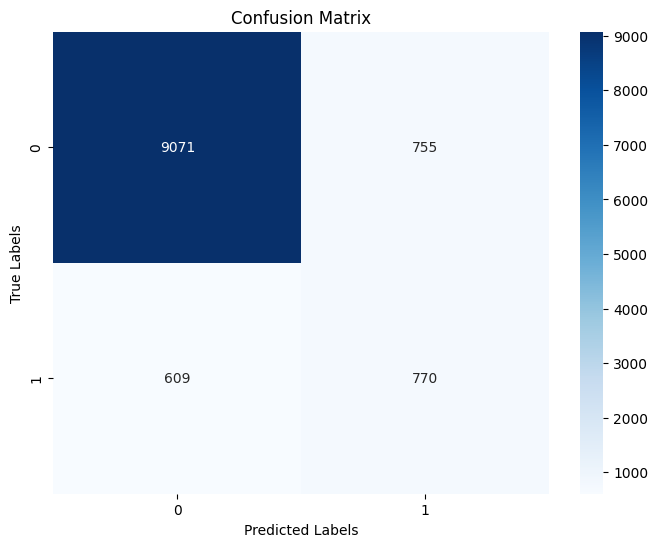

In [362]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, model_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Here consfusion matrix indicates that the model is good at predicting the majority class (0) but struggles to correctly identify instances of class 1.

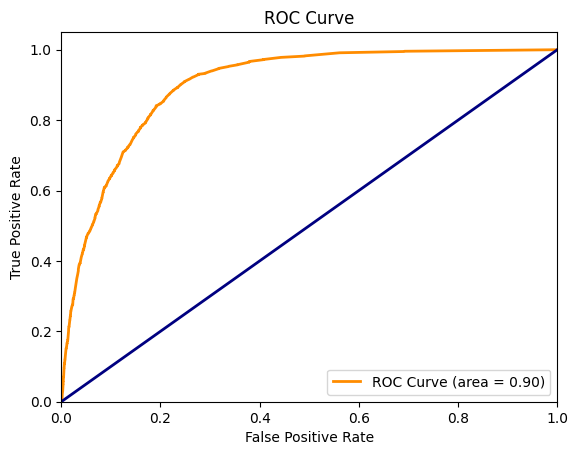

In [363]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The area under the curve (AUC) is 0.90, indicating that the model performs well in distinguishing between the two classes.

In [364]:
# Counting values correctly predicted by the Random Forest model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, model_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Random Forest Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Random Forest Model:
Number of Total Predictions: 11205
Number of Correct Predictions: 9841
Number of Wrong Predictions: 1364


Random Forest Model made an accuracy of 87.8% and an error rate of 12.2%. Best suited model for now than the traditional models.

In [365]:
# Optimizing Random Forest Model

param_grid_rf = {
    'randomforest__n_estimators': [100, 200, 300],
    'randomforest__max_depth': [None, 5],
    'randomforest__max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(pipeline, param_grid_rf, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
best_params_rf = grid_search.best_params_
print(best_params_rf)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\Ap

{'randomforest__max_depth': None, 'randomforest__max_features': 'sqrt', 'randomforest__n_estimators': 100}


In [366]:
# Evaluate the Random Forest model
y_pred_best_rf = best_rf_model.predict(X_test)
evaluate_model(best_rf_model, X_test, y_test, y_pred_best_rf)

Model: Pipeline(steps=[('smote', SMOTE(sampling_strategy='minority')),
                ('randomforest', RandomForestClassifier(random_state=42))])
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      9826
           1       0.51      0.56      0.53      1379

    accuracy                           0.88     11205
   macro avg       0.72      0.74      0.73     11205
weighted avg       0.88      0.88      0.88     11205

Confusion Matrix:
[[9076  750]
 [ 607  772]]
ROC AUC Score:
0.8986003672014887


## Adaboost Model

In [367]:
# AdaBoost Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
# Pipeline
steps = [
    ('smote', SMOTE(sampling_strategy='minority')),  # Focus on minority class
    ('adaboost', ada_model)  # Include your desired AdaBoost hyperparameters
]

# Create a pipeline
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)

# Make predictions on data
model_prediction = pipeline.predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Adaboost Model Evaluation

In [368]:
# Evaluating the model performance
model_accuracy = accuracy_score(y_test, model_prediction)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, model_prediction)
print(f'Classification Report: {class_report}')

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_prediction))

Model Accuracy: 0.8417670682730923
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.87      0.91      9826
           1       0.41      0.64      0.50      1379

    accuracy                           0.84     11205
   macro avg       0.68      0.75      0.70     11205
weighted avg       0.88      0.84      0.86     11205

Confusion Matrix:
[[8551 1275]
 [ 498  881]]


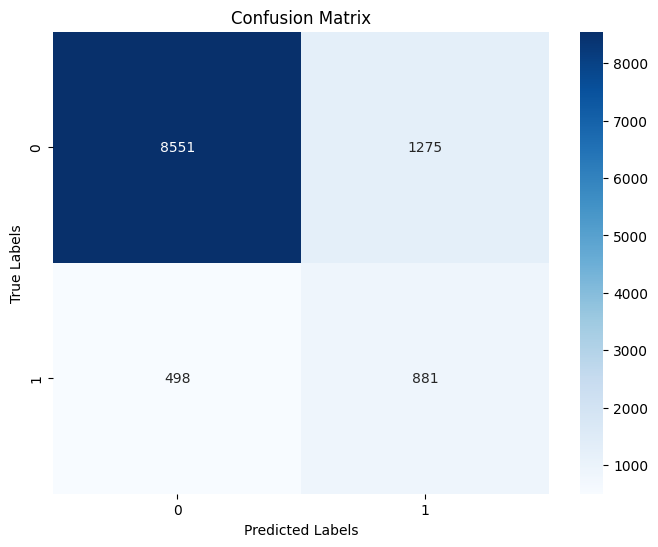

In [369]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, model_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

This model depicts high accuracy (86.81%) but low recall for class 1 (88.1%). This indicates that the model is good at predicting the majority class (0) but struggles to correctly identify instances of class 1.

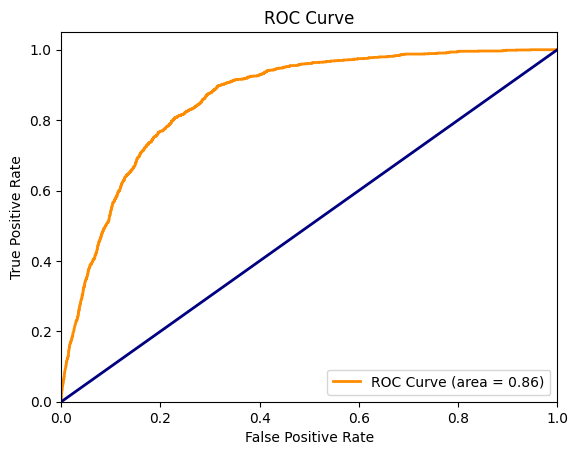

In [370]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [371]:
# Counting values correctly predicted by the Adaboost model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, model_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Adaboost Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Adaboost Model:
Number of Total Predictions: 11205
Number of Correct Predictions: 9432
Number of Wrong Predictions: 1773


The AdaBoost model made 11,205 predictions, with 9,432 correct and 1,773 incorrect, resulting in an accuracy of 84.2% and an error rate of 15.8%

In [372]:
# Optimize Adaboost Model

# Define the parameter grid
param_grid_ada = {
    'adaboost__n_estimators': [50, 100, 200],  
    'adaboost__learning_rate': [0.1, 0.5, 1.0]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid_ada, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_adaboost_model = grid_search.best_estimator_
best_params_ada = grid_search.best_params_
print(best_params_ada)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

{'adaboost__learning_rate': 1.0, 'adaboost__n_estimators': 200}


In [373]:
# Evaluate the Adaboost model
y_pred_best_ada = best_adaboost_model.predict(X_test)
evaluate_model(best_adaboost_model, X_test, y_test, y_pred_best_ada)

Model: Pipeline(steps=[('smote', SMOTE(sampling_strategy='minority')),
                ('adaboost',
                 AdaBoostClassifier(n_estimators=200, random_state=42))])
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      9826
           1       0.45      0.54      0.49      1379

    accuracy                           0.86     11205
   macro avg       0.69      0.72      0.71     11205
weighted avg       0.87      0.86      0.87     11205

Confusion Matrix:
[[8917  909]
 [ 635  744]]
ROC AUC Score:
0.8773250645347981


### Bagging Classifier

In [374]:
# Bagging Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
bagging_model = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)

# Pipeline
steps = [
    ('smote', SMOTE(sampling_strategy='minority')),
    ('bagging', bagging_model)
]

# Create a pipeline
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)

# Make predictions on data
y_pred = pipeline.predict(X_test)

## Bagging Classifier Model Evaluation

In [375]:
# Evaluating the model performance
model_accuracy = accuracy_score(y_test, model_prediction)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, model_prediction)
print(f'Classification Report: {class_report}')

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_prediction))

Model Accuracy: 0.8417670682730923
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.87      0.91      9826
           1       0.41      0.64      0.50      1379

    accuracy                           0.84     11205
   macro avg       0.68      0.75      0.70     11205
weighted avg       0.88      0.84      0.86     11205

Confusion Matrix:
[[8551 1275]
 [ 498  881]]


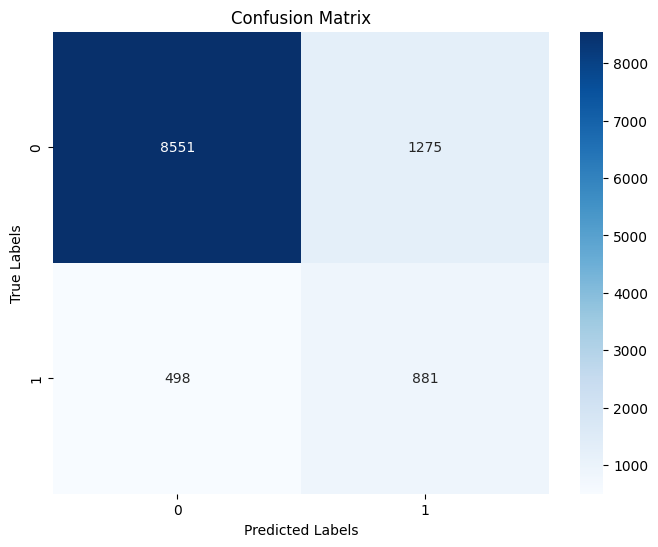

In [376]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, model_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The AdaBoost model made 11,205 predictions, with 9,432 correct and 1,773 incorrect, resulting in an accuracy of 84.2% and an error rate of 15.8%

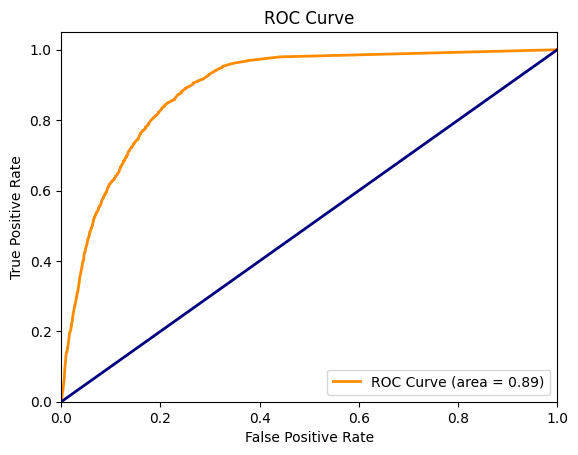

In [377]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The area under the curve (AUC) is 0.89, indicating that the model performs well in distinguishing between the two classes.

In [378]:
# Counting values correctly predicted by the Bagging Classifier Model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, model_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Bagging Classifier Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Bagging Classifier Model:
Number of Total Predictions: 11205
Number of Correct Predictions: 9432
Number of Wrong Predictions: 1773


The Bagging Classifier model made 11,205 predictions, with 9,432 correct and 1,773 incorrect, achieving an accuracy of 84.2% and an error rate of 15.8%

In [379]:
param_grid_bagging = {
    'bagging__n_estimators': [100, 200],
    'bagging__max_samples': [0.8, 1.0],
    'bagging__max_features': [0.8, 1.0]
}

grid_search_bagging = GridSearchCV(pipeline, param_grid_bagging, cv=5, scoring='accuracy')
grid_search_bagging.fit(X_train, y_train)

best_bagging_model = grid_search_bagging.best_estimator_
best_bagging_params = grid_search_bagging.best_params_
print(best_bagging_params)

{'bagging__max_features': 0.8, 'bagging__max_samples': 1.0, 'bagging__n_estimators': 200}


In [380]:
# Evaluate the Bagging Classifier Model
y_pred_best_bag = best_bagging_model.predict(X_test)
evaluate_model(best_bagging_model, X_test, y_test, y_pred_best_bag)

Model: Pipeline(steps=[('smote', SMOTE(sampling_strategy='minority')),
                ('bagging',
                 BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                   max_features=0.8, n_estimators=200,
                                   random_state=42))])
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      9826
           1       0.52      0.56      0.54      1379

    accuracy                           0.88     11205
   macro avg       0.73      0.74      0.74     11205
weighted avg       0.89      0.88      0.88     11205

Confusion Matrix:
[[9111  715]
 [ 606  773]]
ROC AUC Score:
0.9062382334417265


## Voting Classifier (Hard Voting)

In [412]:

# Create a voting classifier with hard voting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg_model),
    ('rf', rf_model),
    ('ada', ada_model)
], voting='hard')

# Create a pipeline
steps = [
    ('smote', SMOTE(sampling_strategy='minority')),
    ('voting', voting_clf)
]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)

# Make predictions on data
model_prediction = pipeline.predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Voting Classifier (Hard Voting) Model Evaluation


In [413]:
# Evaluating the model performance
model_accuracy = accuracy_score(y_test, model_prediction)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, model_prediction)
print(f'Classification Report: {class_report}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, model_prediction))

Model Accuracy: 0.8642570281124498
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.91      0.92      9826
           1       0.46      0.55      0.50      1379

    accuracy                           0.86     11205
   macro avg       0.70      0.73      0.71     11205
weighted avg       0.88      0.86      0.87     11205

Confusion Matrix:
[[8922  904]
 [ 617  762]]


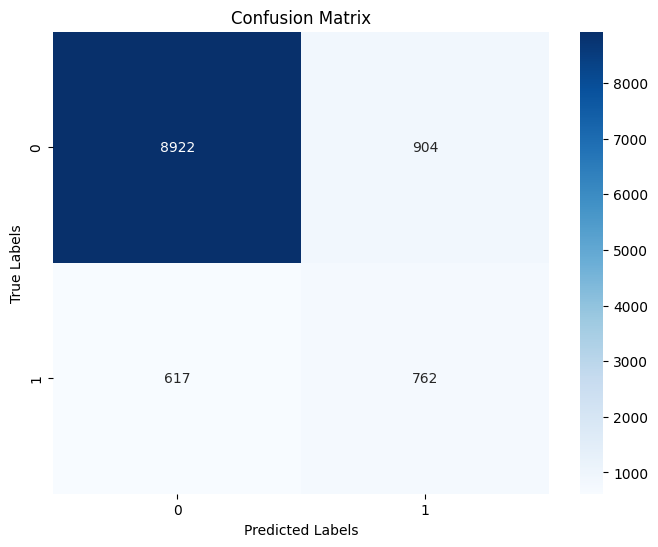

In [414]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, model_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

This predicts that this model has a high accuracy (82.71%) but low recall for class 1 (76.2%). This indicates that the model is good at predicting the majority class (0) but still struggles to correctly identify instances of class 1.

In [415]:
# Counting values correctly predicted by the Voting Classifier (hard voting) Model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, model_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Voting Classifier Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Voting Classifier Model:
Number of Total Predictions: 11205
Number of Correct Predictions: 9684
Number of Wrong Predictions: 1521


The Voting Classifier model made 11,205 predictions, with 9,684 correct and 1,521 incorrect, resulting in an accuracy of 86.4% and an error rate of 13.6

In [416]:
# Optimizing the Voting Classifier (hard voting)
# To Optimize the Voting Classifier, I have used the best parameters of all the 3 models 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('logreg', best_log),
    ('rf', best_rf_model),
    ('ada', best_adaboost_model)
], voting='hard')

# Create a pipeline
steps = [
    ('smote', SMOTE(sampling_strategy='minority')),
    ('voting', voting_clf)
]
voting_hard_pipeline = Pipeline(steps=steps)
voting_hard_pipeline.fit(X_train, y_train)
best_vote_model = voting_hard_pipeline.predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [417]:
# Evaluate the Voting Classifier (hard voting) Model
model_accuracy = accuracy_score(y_test, best_vote_model)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, best_vote_model)
print(f'Classification Report: {class_report}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, best_vote_model))


Model Accuracy: 0.8662204373047746
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.91      0.92      9826
           1       0.46      0.54      0.50      1379

    accuracy                           0.87     11205
   macro avg       0.70      0.73      0.71     11205
weighted avg       0.88      0.87      0.87     11205

Confusion Matrix:
[[8964  862]
 [ 637  742]]


## Voting Classifier (Soft Voting)

In [418]:
# Voting Classifier (soft voting)
# Create a voting classifier with soft voting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg_model),
    ('rf', rf_model),
    ('ada', ada_model)
], voting='soft')

# Create a pipeline
steps = [
    ('smote', SMOTE(sampling_strategy='minority')),
    ('voting', voting_clf)
]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)

# Make predictions on data
model_prediction = pipeline.predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Voting Classifier (Soft Voting) Model Evaluation

In [419]:
# Evaluating the model performance
model_accuracy = accuracy_score(y_test, model_prediction)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, model_prediction)
print(f'Classification Report: {class_report}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, model_prediction))

Model Accuracy: 0.8753235162873717
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.93      0.93      9826
           1       0.49      0.52      0.50      1379

    accuracy                           0.88     11205
   macro avg       0.71      0.72      0.72     11205
weighted avg       0.88      0.88      0.88     11205

Confusion Matrix:
[[9097  729]
 [ 668  711]]


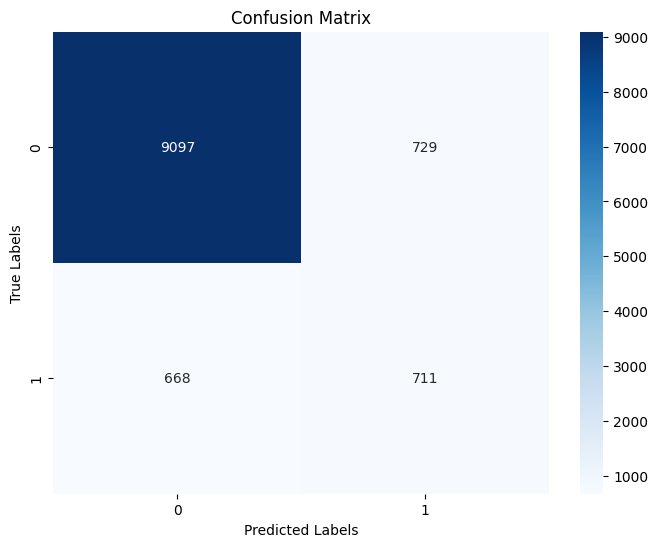

In [420]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, model_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

This model has a high accuracy ( 81.04%) but low recall for class 1 (71.1%). This indicates that the model is good at predicting the majority class (0) but struggles to correctly identify instances of class 1.

In [421]:
# Counting values correctly predicted by the Voting Classifier (soft voting) Model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, model_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Voting Classifier Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Voting Classifier Model:
Number of Total Predictions: 11205
Number of Correct Predictions: 9808
Number of Wrong Predictions: 1397


This model achieved an accuracy of 87.5%, correctly predicting 9808 out of 11205 samples. However, it made 1397 incorrect predictions, still indicating room for improvement.

In [422]:
# Optimizing the Voting Classifier (soft voting)
# To Optimize the Voting Classifier, I have used the best parameters of all the 3 models 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('logreg', best_log),
    ('rf', best_rf_model),
    ('ada', best_adaboost_model)
], voting='soft')

# Create a pipeline
steps = [
    ('smote', SMOTE(sampling_strategy='minority')),
    ('voting', voting_clf)
]
voting_soft_pipeline = Pipeline(steps=steps)
voting_soft_pipeline.fit(X_train, y_train)
best_vote_model = voting_soft_pipeline.predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [423]:
# Evaluate the Voting Classifier (soft voting) Model
model_accuracy = accuracy_score(y_test, best_vote_model)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, best_vote_model)
print(f'Classification Report: {class_report}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, best_vote_model))


Model Accuracy: 0.8757697456492637
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.92      0.93      9826
           1       0.50      0.55      0.52      1379

    accuracy                           0.88     11205
   macro avg       0.72      0.73      0.72     11205
weighted avg       0.88      0.88      0.88     11205

Confusion Matrix:
[[9061  765]
 [ 627  752]]


# Performance Comparison

### Executed a total of 7 Models namely:
#### 1. Traditional Models: Logistic Regression and KNN Models
#### 2. Ensemble Models: Random Forest, Adaboost
####      a. Bagging Classifier
####      b. Voting Classifier (soft and hard voting)

### Model Run-time:
#### As observed through the code, Random Forest and Bagging Classifier took the most amount of time to run whereas Logistic Regression took the least amount of time to run.
#### But even through the Bagging Classifier took time the Precision and Recall score of Logistic Regression is not good and there is where it is better to consider a time tradeoff with model performance 

### For Best Model Comparison:
#### For High precision for Class 1: Random Forest or Bagging performed the best among all the models
#### For High recall for Class 1: KNN or AdaBoost performed the best among all the models
#### But it is necessary to consider a tradeoff between precision and recall as just considering one factor would give us skewed results
#### Hence for a balance between precision and recall: Random Forest or Bagging performed the best among all the models
#### But Precision and Recall Scores for both Class 0 and Class 1: Bagging Classifier performed the best
#### Best Model based on analysis: Bagging Classifier



# Business Report

## 1. Ensemble Model Performance:

#### For Traditional Models follows a set pattern and inturn to improve or optimize the model one of the most efficient ways to do so would be either to perform feature engineering or add more input variable columns for the model to be trained on to improve the accuracy.
#### But in this case, the model can lead to overfitting or underfitting and the performance for large datasets is not at par with the other learning models present.
#### This could be a huge drawback and might not help us for large or imbalanced datasets

#### While considering  Ensemble Models they are majorly broken down into 2 categories:
#### 1. Bagging Algorithms: Is based on averaging methods
#### 2. Boosting Algorithms: It is based on sequential leaners, boosting different trees sequentially

#### Due to these methods involved in Ensemble Models they use these different techniques and this can help improve the accuracy or precision and recall scores as the model learns while training the model to build the best distinction features for the prediction
#### It also has different models that can be used to deal with missing data and imbalanced data.
#### Paired with resampling these models can perform well with both huge datasets and imbalanced datasets
#### Hence, Ensemble Models can be used for different business cases and perform better than traditional models

## 2. Best Model for Business Case:

#### The Best Model for the Banking Business Case would be to use the Bagging Classifier.
#### Based on the performance metrics the Bagging Classifier is the most suitable due to its performance not just for accuracy but for an imbalanced banking dataset considering the precision and recall is more important and based on our model evaluation on these two metrics is what prompted us to suggest Bagging Classifier as the best model.

#### Yes, the Computational cost of the Bagging Classifier would be more as compared to some of the other models evaluated but these expenses can be mitigated by parallely training the base models to reduce the cost.

#### The computational cost can be reduced by using a set number of decision trees which gives us an opportunity to test with multiple criterias to better suit the business needs.

#### The base model used for Bagging Classifier are decision trees which increases the interpretability of the models as compared to other ensemble learning models. The individual trees can be easily interpretable and the decision process can be tracked back to the different decision criterias within the different trees.

#### Due to this reason the Bagging Classifier used can be better understood by plotting the decsion trees and understanding the decision process behind the prediction given by the model.

## 3. Decision Criteria for Model:

#### One of the major decision criteria for selecting the model is for the trade-off between precision and recall score as well as a good roc curve score. These metrics show us that the model can handle variability and imbalanced dataset to predict the clients that would subscribe for term deposits.

#### Also, to reduce complete dependency on a single model, Bagging classifier is suitable as it avoids the different generalization of other models and also can prevent the risk of overfitting as multiple decision trees are used.

#### It also reduces variability within the data and is robust to outlier or noisy data present in the dataset which is prevalent for the banking dataset.

#### This makes the Bagging Classifier versatile while dealing with imbalanced or complex data and could handle such data for future data points after the deployment of the model.